# Librerías y configuraciones

In [1]:
# Arrays para manipular datos
import numpy as np
import pandas as pd

# Gráficos
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 8)
import seaborn as sns
sns.set(style="darkgrid", font_scale=1.5)

# Ciencia de datos, machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split 
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report, recall_score
from sklearn.metrics import precision_score, f1_score, plot_roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import scipy.cluster.hierarchy as sch

# Carga de datos

In [2]:
# https://drive.google.com/file/d/1sWLmuazrRKlb1_c88soFRqQYF0wXCxgT/view?usp=sharing
data = pd.read_csv("./segmentation data.csv")
data.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [3]:
# Eliminamos el ID
data = data.drop('ID', axis = 1)

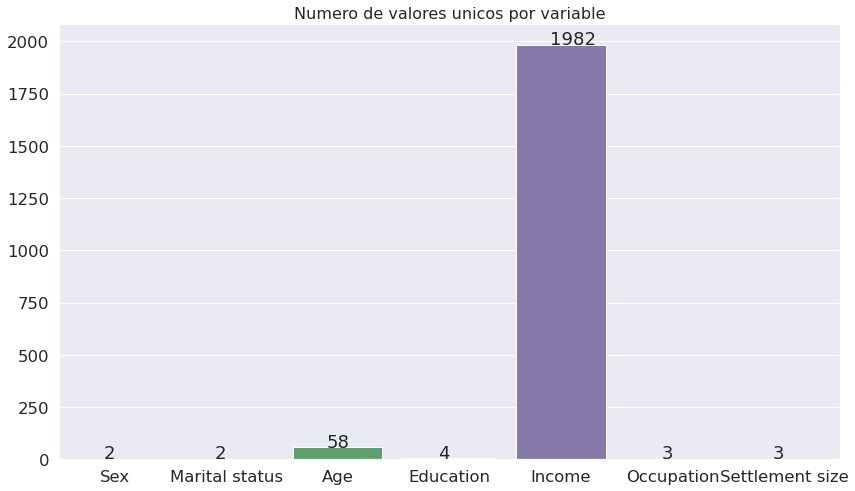

In [4]:
plt.figure(figsize=(14,8))
x = list(data.nunique().index)
y = data.nunique().values
for i in range(len(x)):
        plt.text(i-.1,y[i]+2,str(y[i]))
plt.title("Numero de valores unicos por variable",fontdict={"fontsize":16})
sns.barplot(x = x,y = y)
plt.show();

In [5]:
data.info()
data.sample(15)
data.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 109.5 KB


Index(['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation',
       'Settlement size'],
      dtype='object')

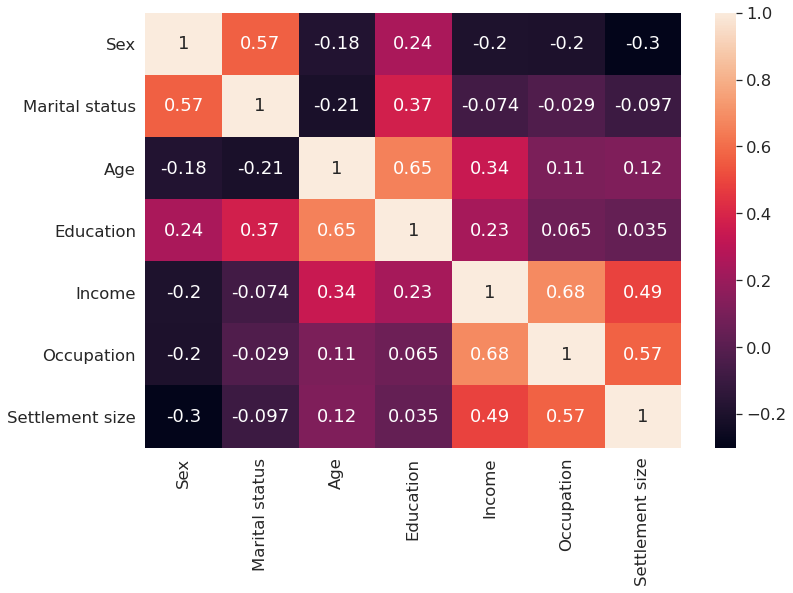

In [6]:
sns.heatmap(data.corr(), annot=True);

# Escalado



In [7]:
scaler = StandardScaler()
scaler.fit(data)
data_escalada = scaler.transform(data)
#data_escalada
data_escalada_df = pd.DataFrame(data_escalada, index=data.index, columns=data.columns)
data_escalada_df.sample(15)

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
346,-0.917399,-0.993024,-1.101782,-1.731068,-0.659839,0.296823,1.552326
1972,1.090038,1.007025,-0.162933,-0.063372,0.128312,-1.269525,-0.909730
1919,1.090038,1.007025,-0.845732,-0.063372,-0.652831,-1.269525,-0.909730
831,1.090038,1.007025,-1.101782,-0.063372,-0.625718,0.296823,1.552326
1000,1.090038,1.007025,2.312215,1.604323,0.364799,0.296823,0.321298
68,-0.917399,-0.993024,0.093117,-0.063372,-0.366842,0.296823,1.552326
72,-0.917399,-0.993024,1.288016,-0.063372,0.548661,1.863171,1.552326
1273,-0.917399,1.007025,-1.272482,-0.063372,-0.511385,1.863171,0.321298
877,-0.917399,-0.993024,-0.675033,-1.731068,-0.107782,0.296823,0.321298
392,-0.917399,-0.993024,0.263817,-0.063372,0.822786,1.863171,0.321298


# PCA exploratorio



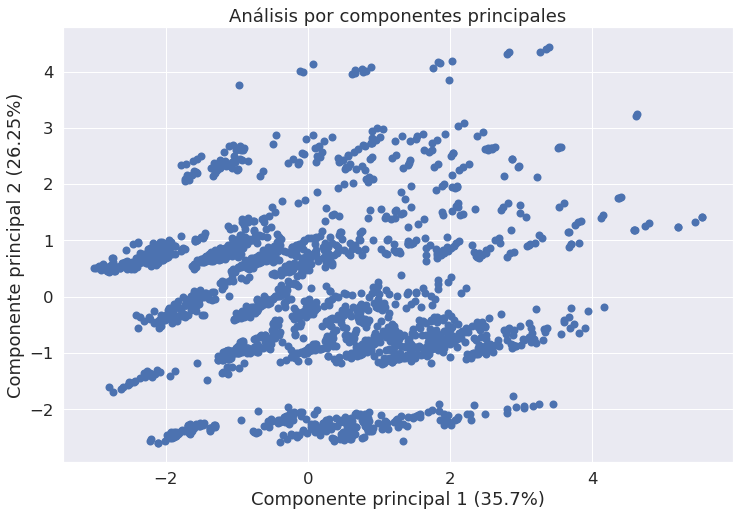

In [8]:
# instancio la clase
pca = PCA()
# calculo PCA
pca.fit(data_escalada)
# transformo los datos originales al plano PCA
pca_data = pca.transform(data_escalada)

# cálculo varianza explicada
vars = pca.explained_variance_ratio_
var1 = round(100*vars[0],2)
var2 = round(100*vars[1],2)

# gráfico
#plt.scatter(x=pca_data[:,0], y=pca_data[:,1], lw=2, c=data['Income'])
plt.scatter(x=pca_data[:,0], y=pca_data[:,1], lw=2)
plt.xlabel("Componente principal 1 ({}%)".format(var1))
plt.ylabel("Componente principal 2 ({}%)".format(var2))
plt.title("Análisis por componentes principales")
plt.show()

In [9]:
var_pc = pca.explained_variance_ratio_

indice = 1
for var in var_pc:
    print("PCA{:02} : {:05.4f}".format(indice, round(var,4)))
    indice += 1
    
#print(pca.components_[0])
#print(pca.components_[1])

cargas = pd.DataFrame(pca.components_.T,
                        columns=['PC%s' % _ for _ in range(len(data_escalada_df.columns))],
                        index=data_escalada_df.columns)
cargas

PCA01 : 0.3570
PCA02 : 0.2625
PCA03 : 0.1882
PCA04 : 0.0756
PCA05 : 0.0572
PCA06 : 0.0395
PCA07 : 0.0200


,PC0,PC1,PC2,PC3,PC4,PC5,PC6
Sex,-0.314695,0.458006,-0.293013,-0.315601,-0.707185,-0.051119,-0.054893
Marital status,-0.191704,0.512635,-0.441977,0.280454,0.497560,0.125517,-0.403901
Age,0.326100,0.312208,0.609544,-0.009506,-0.135160,-0.099586,-0.629576
Education,0.156841,0.639807,0.275605,0.181476,0.106597,-0.114333,0.657816
Income,0.524525,0.124683,-0.165662,-0.482600,0.078890,0.662812,0.058633
Occupation,0.492059,0.014658,-0.395505,-0.281690,0.133942,-0.709121,-0.033115
Settlement size,0.464789,-0.069632,-0.295685,0.690265,-0.445565,0.128339,-0.015129


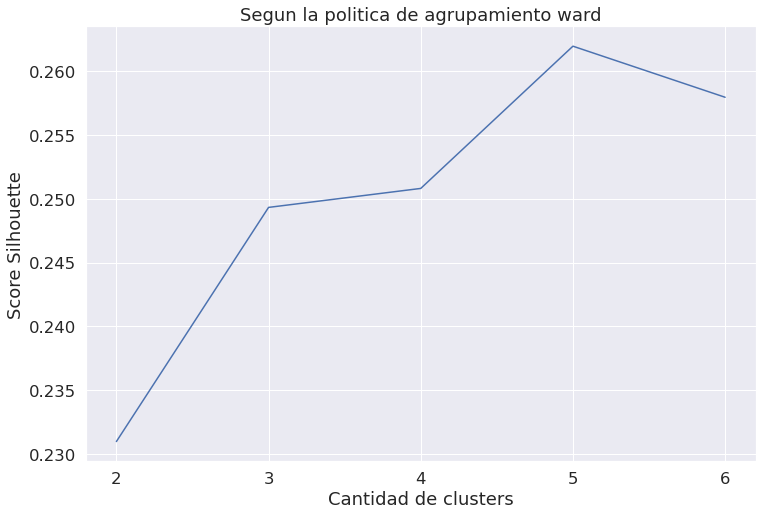

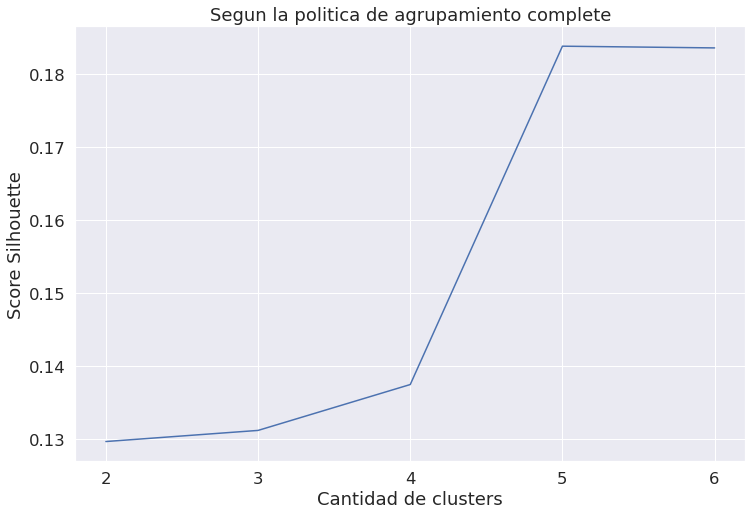

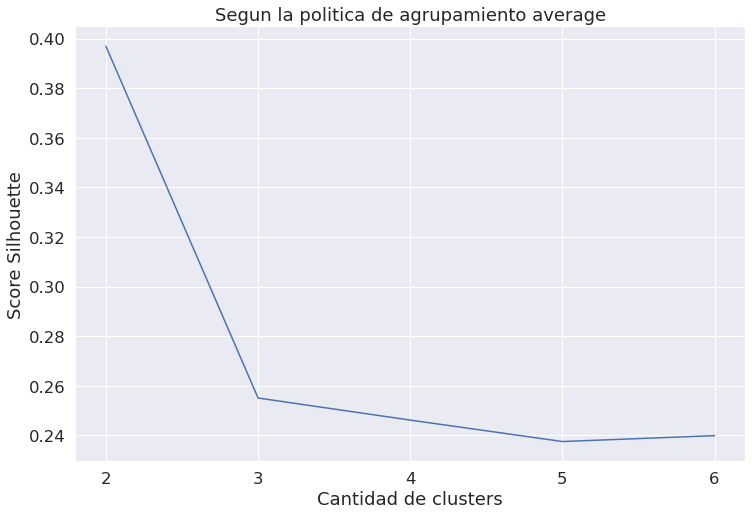

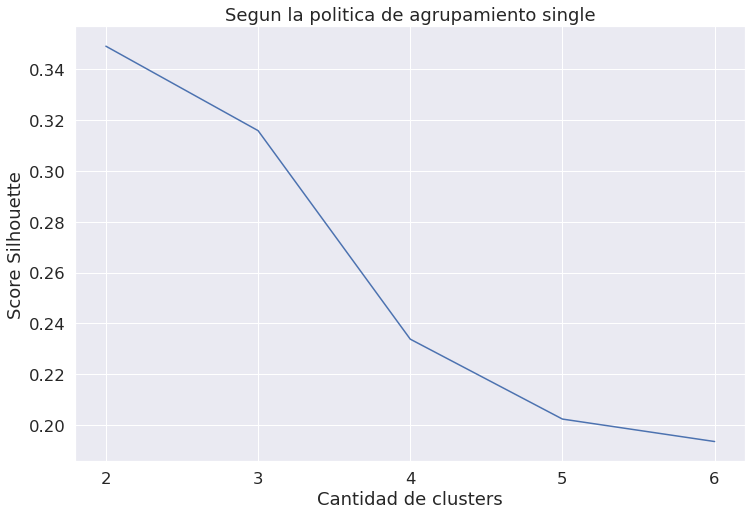

In [11]:
# Silhouette score: va entre -1 y 1 (1 es lo mejor).
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html
# https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient

politica_agrupamiento = ['ward', 'complete', 'average', 'single']

silhouette_scores = []

rango_clusters = range(2,7)
for n in range(0,len(politica_agrupamiento)):
    for i in rango_clusters:
        # para cada valor de i, calculo Agglomerative y silhouette
        clustering = AgglomerativeClustering(n_clusters=i, linkage=politica_agrupamiento[n])
        clustering.fit(data_escalada_df)
    
        sil_score = silhouette_score(data_escalada_df, labels=clustering.labels_)
        silhouette_scores.append(sil_score)

    plt.plot(rango_clusters,silhouette_scores)
    plt.xticks(rango_clusters)
    plt.xlabel('Cantidad de clusters')
    plt.ylabel('Score Silhouette')
    plt.title('Segun la politica de agrupamiento {}'.format(politica_agrupamiento[n]))
    plt.show()
    silhouette_scores.clear()

Nos parecen mas logicas las distancias ward y complete

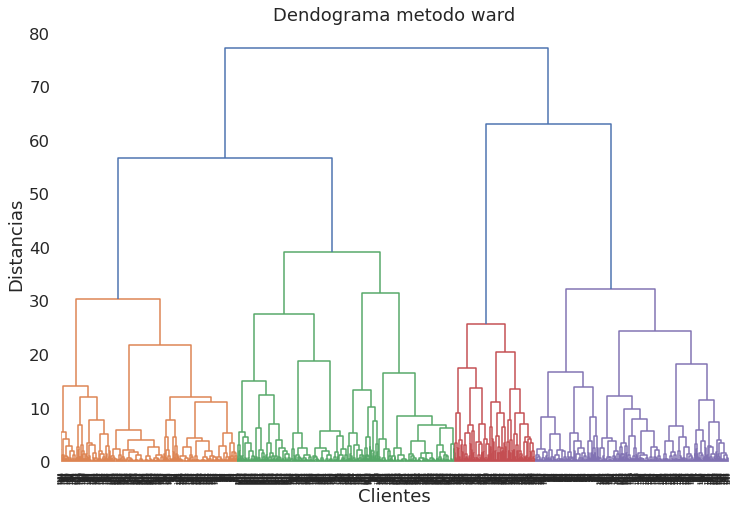

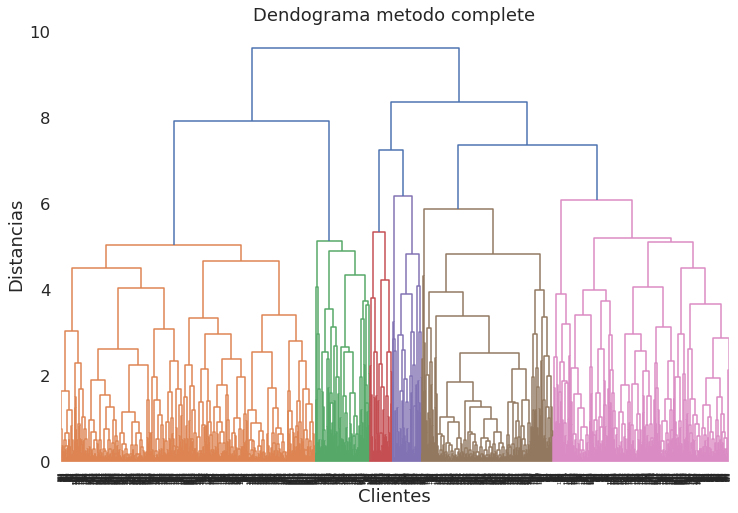

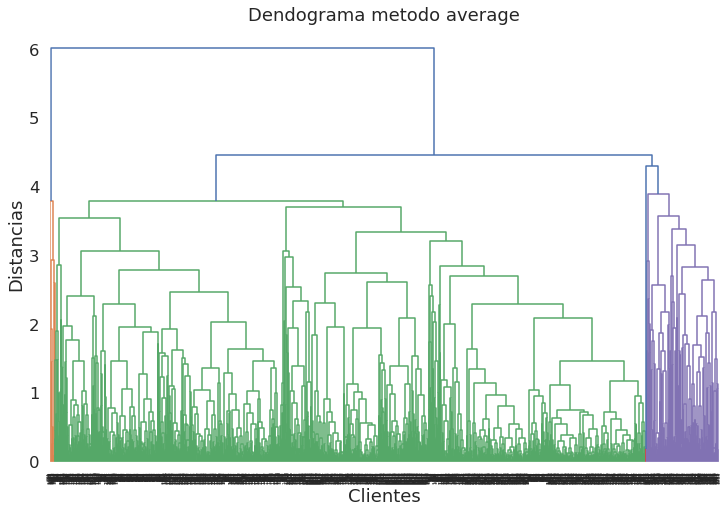

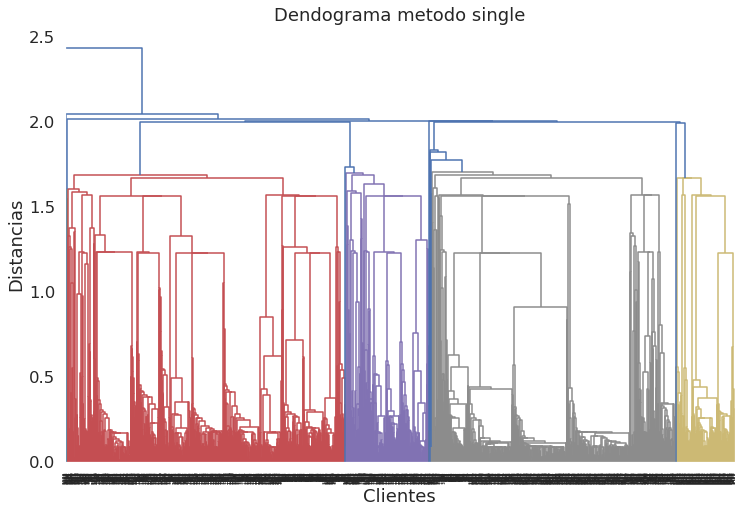

In [14]:
for n in range(0,len(politica_agrupamiento)):
    dendrogram = sch.dendrogram(sch.linkage(data_escalada, method = politica_agrupamiento[n]))

    plt.title('Dendograma metodo {}'.format(politica_agrupamiento[n]))
    plt.xlabel('Clientes')
    plt.ylabel('Distancias')
    plt.show()

Tanto por Silhouette como por el grafico del dendograma vemos que con distancias ward y complete el numero mas comun de clusters es 4

In [15]:
# Elijo la cantidad de clusters
cant_clusters = 4

# Clustering (agrupamiento) por Agglomerative

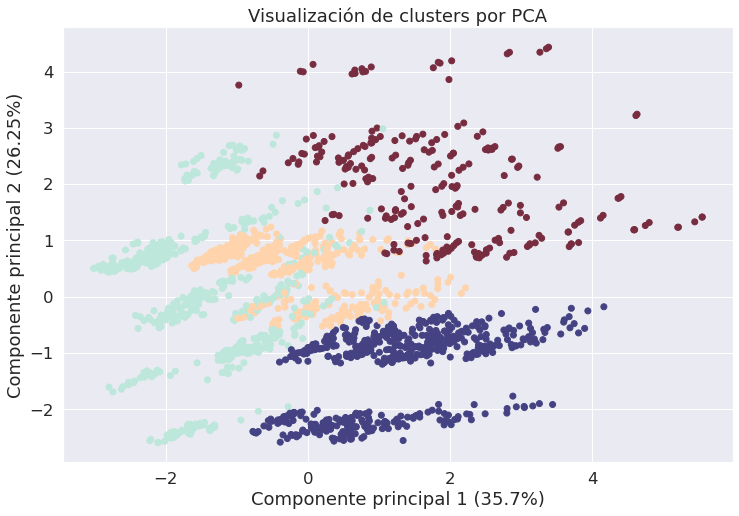

In [16]:
# instancio la clase
agglomerative = AgglomerativeClustering(n_clusters=cant_clusters)
# entreno al modelo
agglomerative.fit(data_escalada)
# que me prediga el cluster para cada dato
y_agglomerative = pd.Series(agglomerative.fit_predict(data_escalada))


# grafico en el plano PCA datos, clusters y centroides
plt.scatter(pca_data[:,0],pca_data[:,1], c=agglomerative.labels_, cmap="icefire")
plt.xlabel("Componente principal 1 ({}%)".format(var1))
plt.ylabel("Componente principal 2 ({}%)".format(var2))
plt.title("Visualización de clusters por PCA")
plt.show()

# Exploración de las características de los clusters

In [17]:
# Agrega una nueva variable con el cluster al que pertenece cada observación
data["Cluster"] = y_agglomerative
data_escalada_df["Cluster"] = y_agglomerative
# Calculo la media de cada variable para cada cluster
data.groupby(["Cluster"]).mean()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Cluster,,,,,,,
0,0.640986,0.445300,34.583975,0.992296,90807.328197,0.101695,0.023112
1,0.000000,0.000000,36.813472,0.673575,137369.343696,1.176166,1.245250
2,0.497925,0.717842,54.593361,2.120332,163924.684647,1.257261,1.219917
3,0.711864,1.000000,28.062147,1.000000,120399.591337,1.075330,0.843691


In [18]:
data.groupby(["Cluster"]).std()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Cluster,,,,,,,
0,0.480081,0.497382,10.537241,0.548513,22635.621389,0.312517,0.150377
1,0.000000,0.000000,8.427367,0.469310,32264.492958,0.481547,0.740773
2,0.501036,0.450986,11.243174,0.384656,45716.562464,0.570270,0.722681
3,0.453322,0.000000,4.908781,0.000000,22852.645876,0.310164,0.777061


KeyboardInterrupt: 

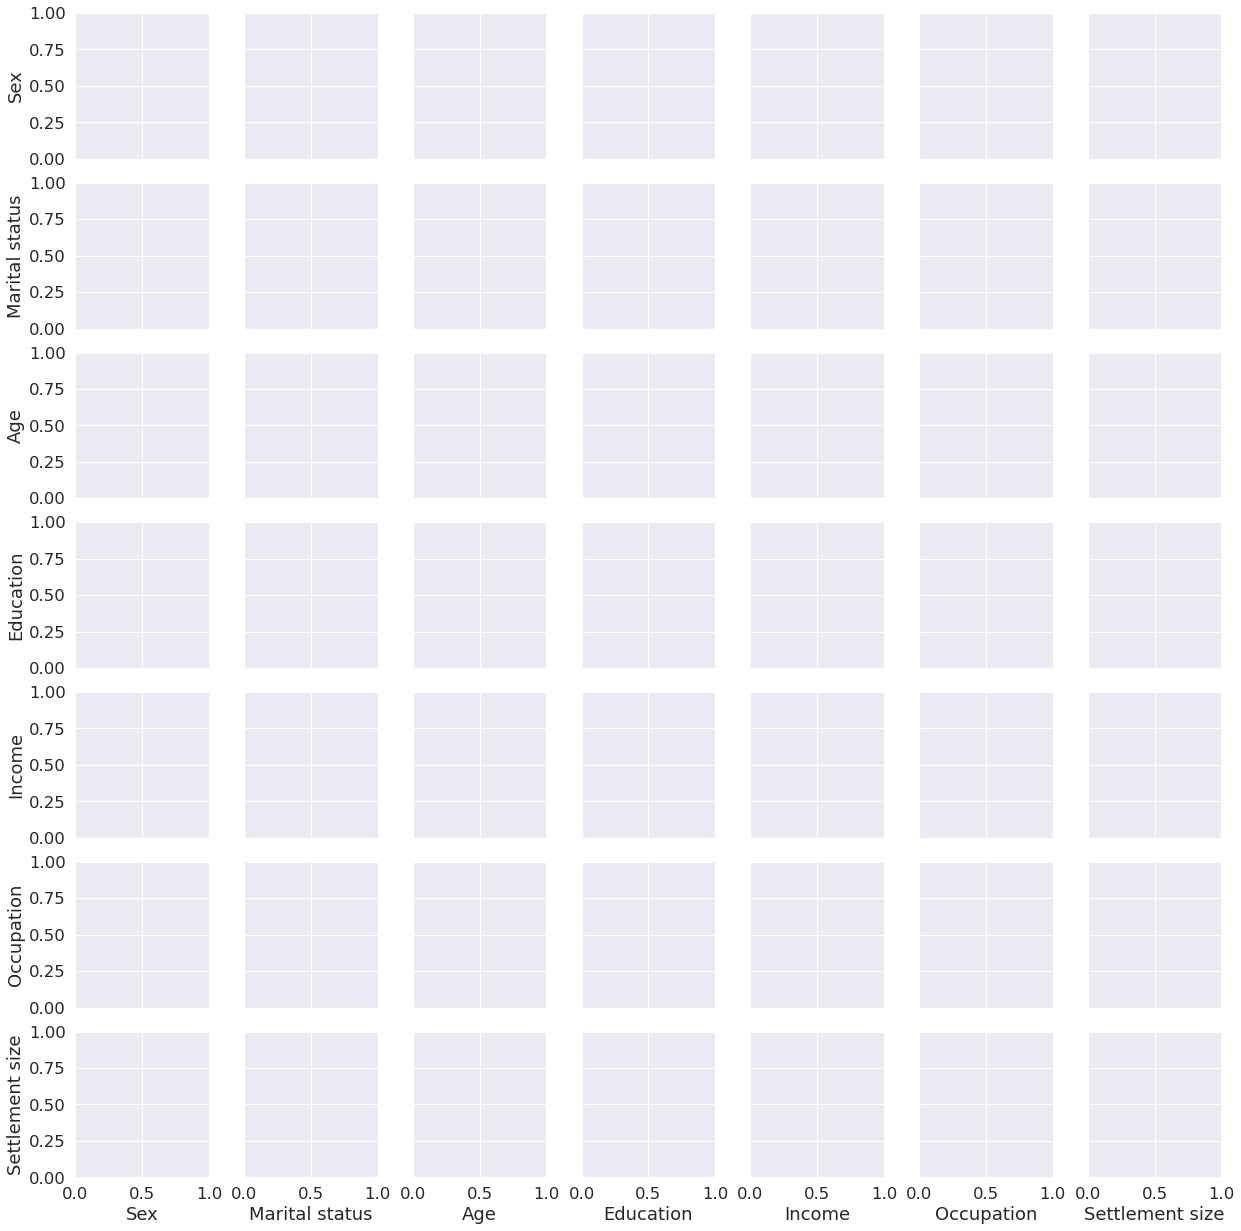

In [19]:
# densidades para cada variable, y scatter plots dos a dos, identificando cada cluster.
#sns.pairplot(data, hue="Cluster", palette=['green','orange','brown', 'cyan', 'yellow'])
sns.pairplot(data, hue="Cluster", palette="icefire")

plt.show();

## Ahora que lo tenemos clasificado lo analizamos por bayes ingenuo


In [20]:
# Separamos en features y target y normalizamos las features
# separamos
target = data_escalada_df['Cluster']
features = data_escalada_df.drop(columns = 'Cluster')
# Separamos en test y entrenamiento
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=0)


In [21]:
# Modelo Bayes ingenuo
gnb = GaussianNB() 
gnb = gnb.fit(x_train,y_train)

In [22]:
# Matriz de confusion sobre test
y_pred=gnb.predict(x_test)

cf_matriz = confusion_matrix(y_test,y_pred)

print("F1 score :\n",f1_score(y_test,y_pred, average='micro'))
cf_matriz

F1 score :
 0.7525


array([[ 48,  40,   7,  41],
       [  0, 112,   0,   0],
       [  1,  10,  33,   0],
       [  0,   0,   0, 108]])

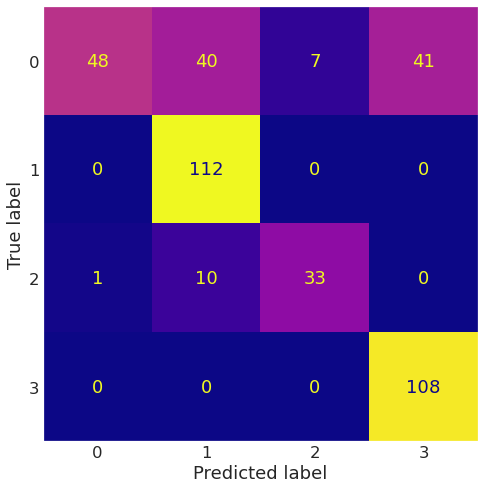

In [23]:
# plt.rcParams["figure.figsize"] = (15,15)
# grafico matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matriz, display_labels=gnb.classes_)
disp.plot(values_format='d', colorbar=False, cmap='plasma') 
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.grid(b=None)

Como nos da bastante distinto que con kmeans, vamos a hacer todo distinto y elegiremos  el valor que sugiere silhouette (5 clusters) y repetir el analisis

In [24]:
# Elijo la cantidad de clusters
cant_clusters = 5

# Clustering (agrupamiento) por Agglomerative

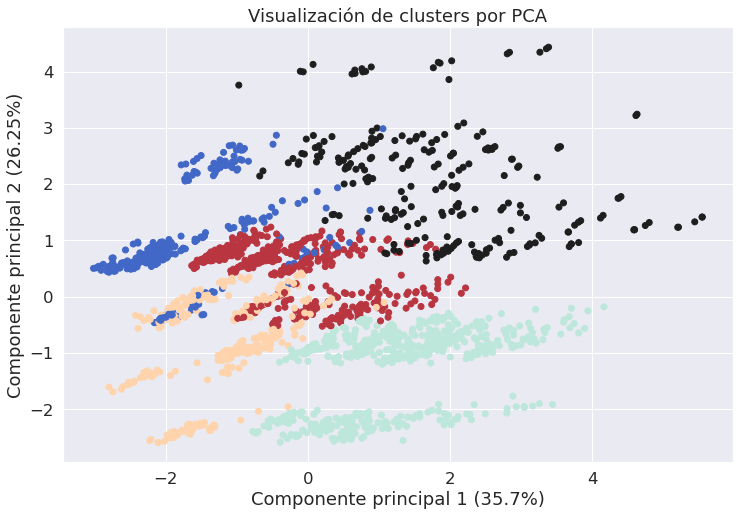

In [25]:
# instancio la clase
agglomerative = AgglomerativeClustering(n_clusters=cant_clusters)
# entreno al modelo
agglomerative.fit(data_escalada)
# que me prediga el cluster para cada dato
y_agglomerative = pd.Series(agglomerative.fit_predict(data_escalada))


# grafico en el plano PCA datos, clusters y centroides
plt.scatter(pca_data[:,0],pca_data[:,1], c=agglomerative.labels_, cmap="icefire")
plt.xlabel("Componente principal 1 ({}%)".format(var1))
plt.ylabel("Componente principal 2 ({}%)".format(var2))
plt.title("Visualización de clusters por PCA")
plt.show()

# Exploración de las características de los clusters

In [26]:
# Agrega una nueva variable con el cluster al que pertenece cada observación
data["Cluster"] = y_agglomerative
data_escalada_df["Cluster"] = y_agglomerative
# Calculo la media de cada variable para cada cluster
data.groupby(["Cluster"]).mean()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Cluster,,,,,,,
0,0.000000,0.000000,36.813472,0.673575,137369.343696,1.176166,1.245250
1,0.800000,0.903125,35.037500,1.290625,90027.456250,0.006250,0.009375
2,0.497925,0.717842,54.593361,2.120332,163924.684647,1.257261,1.219917
3,0.711864,1.000000,28.062147,1.000000,120399.591337,1.075330,0.843691
4,0.486322,0.000000,34.142857,0.702128,91565.866261,0.194529,0.036474


In [27]:
data.groupby(["Cluster"]).std()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Cluster,,,,,,,
0,0.000000,0.000000,8.427367,0.469310,32264.492958,0.481547,0.740773
1,0.400626,0.296251,12.534535,0.468346,23500.322271,0.078933,0.096521
2,0.501036,0.450986,11.243174,0.384656,45716.562464,0.570270,0.722681
3,0.453322,0.000000,4.908781,0.000000,22852.645876,0.310164,0.777061
4,0.500574,0.000000,8.133843,0.458020,21770.710111,0.411534,0.187752


In [28]:
# densidades para cada variable, y scatter plots dos a dos, identificando cada cluster.
#sns.pairplot(data, hue="Cluster", palette=['green','orange','brown', 'cyan', 'yellow'])
sns.pairplot(data, hue="Cluster", palette="icefire")

plt.show();

/home/administrador/anaconda3/envs/ds-up/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/administrador/anaconda3/envs/ds-up/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/administrador/anaconda3/envs/ds-up/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/administrador/anaconda3/envs/ds-up/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/administrador/anaconda3/envs/ds-up/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7fe8d7fb8dc0> (for post_execute):


KeyboardInterrupt: 

## Ahora que lo tenemos clasificado lo analizamos por bayes ingenuo


In [29]:
# Separamos en features y target y normalizamos las features
# separamos
target = data_escalada_df['Cluster']
features = data_escalada_df.drop(columns = 'Cluster')
# Separamos en test y entrenamiento
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=0)


In [30]:
# Modelo Bayes ingenuo
gnb = GaussianNB() 
gnb = gnb.fit(x_train,y_train)

In [31]:
# Matriz de confusion sobre test
y_pred=gnb.predict(x_test)

cf_matriz = confusion_matrix(y_test,y_pred)

print("F1 score :\n",f1_score(y_test,y_pred, average='micro'))
cf_matriz

F1 score :
 0.745


array([[112,   0,   0,   0,   0],
       [  3,  10,   1,  41,   2],
       [ 10,   2,  32,   0,   0],
       [  0,   0,   0, 108,   0],
       [ 37,   0,   6,   0,  36]])

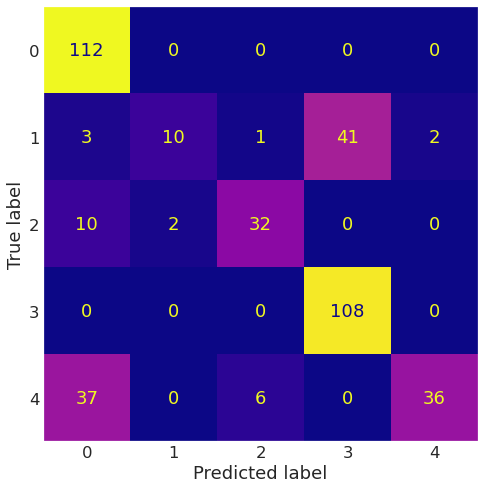

In [32]:
# plt.rcParams["figure.figsize"] = (15,15)
# grafico matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matriz, display_labels=gnb.classes_)
disp.plot(values_format='d', colorbar=False, cmap='plasma') 
plt.tick_params(axis=u'both', which=u'both',length=0)
plt.grid(b=None)

Tendriamos tambien que repetir kmeans con 5 clusters para poder comparar los datos